Link to dataset : https://drive.google.com/file/d/1sbQ5WJ-KCPBrhT2YagtaARGoujCMpB8Q/view

# SA-2025 WEEK 3 GRADED ASSIGNMENT

> Spaceship Titanic

Predict which passengers are transported to an alternate dimension

![](https://www.gannett-cdn.com/-mm-/682bf77435754aee88576469063388a7d8b07c2a/c=0-150-1280-873/local/-/media/2017/02/01/Reno/RGJ/636215634914521096-image001.jpg?width=660&height=373&fit=crop&format=pjpg&auto=webp)


### <b>Description</b>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

### <b>Data description</b>

- Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- <code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- <code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.
- <code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- <code>Cabin</code> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- <code>Destination</code> - The planet the passenger will be debarking to.
- <code>Age</code> - The age of the passenger.
- <code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.
- <code>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</code> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- <code>Name</code> - The first and last names of the passenger.
- <code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


### <b>Algorithm Documentation</b> (Highly recommended!)
- <code>Logistic Regression</code> : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- <code>SVM</code> : https://scikit-learn.org/stable/modules/svm.html
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- <code>Plot Confusion Matrix</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
- <code>ROC_AUC Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
- <code>Classification Report</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- <code>Label Encoder</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- <code>Label Binarizer</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
- <code>Standard Scaler</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- <code>Cross Val Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Install Required Libraries</h1></span>

In [1]:
!pip install --upgrade scikit-learn  #There was an error with importing confusion_matrix from sklearn.mertices , so there was a need to upgrade it for google colab
# even after upgrading the plot_confusion_matrix didnt worked as it has been changed in new version

ERROR: Invalid requirement: '#There': Expected package name at the start of dependency specifier
    #There
    ^


In [2]:
## ======== YOUR CODE HERE ======== ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#### Read the data

In [4]:
# !gdown --id 1sbQ5WJ-KCPBrhT2YagtaARGoujCMpB8Q -O data.csv

# Read the data into a pandas DataFrame
df = pd.read_csv("C:\\Games\\data.csv")

#### Check the shape of data. It should be  (8693, 14)

In [5]:
## ======== YOUR CODE HERE ======== ##
df.shape
## ================================ ##

(8693, 14)

#### Apply describe on dataframe

In [6]:
## ======== YOUR CODE HERE ======== ##
df.describe()

## ================================ ##

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### Check if there any null value in the dataset.

In [7]:
## ======== YOUR CODE HERE ======== ##
df.isnull().sum()

## ================================ ##

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

#### Number continuous and categorical features

In [8]:
#################################################################

# Don't make mistake here. Ask in the discussion section if you are stuck. Help will be provided....

#################################################################

## ======== YOUR CODE HERE ======== ##
df.dtypes.value_counts()
## ======== YOUR CODE HERE ======== ##

int64     6
object    5
bool      3
Name: count, dtype: int64

#### Unique values

In [9]:
# Print the number of unique values of the categorical features

## ======== YOUR CODE HERE ======== ##
df.nunique()
## ======== YOUR CODE HERE ======== ##

# seeing the n-unique for passengerID , we can say there is no error and no overlap in passengerID as all are unique .
# But there is an anomaly as Name of passengers might overlap as not all of them are unique .

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

<code>Note: If we apply one-hot-encoding to a categorical feature with many unique values, </code>
- Number of columns will be high
- Time required for training a model will be high
- We may not get usefull insights about the data

<code>This is the reason we are droping the features with more unique values.</code>


#### Drop the features

In [10]:
# Drop those categorical features which have more than 25 unique values

## ======== YOUR CODE HERE ======== ##
df.drop(['Name','PassengerId','Cabin'],axis=1,inplace=True)
## ======== YOUR CODE HERE ======== ##

# Print the shape after droping the features
# Check: Shape --> (8693, 11)

## ======== YOUR CODE HERE ======== ##
df.shape
## ======== YOUR CODE HERE ======== ##

(8693, 11)

#### One Hot Encoding

In [11]:
# Hint: search for get_dummies

## ======== YOUR CODE HERE ======== ##
dummy_df=pd.get_dummies(df)
## ======== YOUR CODE HERE ======== ##
dummy_df.shape
# Check: Shape --> (8693, 15)

(8693, 15)

#### Changing bool columns to 0,1

In [12]:
## ======== Run this code(Don't change any code)======== ##

df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

df.head()

## ======== Run this code(Don't change any code)======== ##


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,Andromeda,39,0,0,0,0,0,0,0
1,Earth,0,Andromeda,24,0,109,9,25,549,44,1
2,Europa,0,Andromeda,58,1,43,3576,0,6715,49,0
3,Europa,0,Andromeda,33,0,0,1283,371,3329,193,0
4,Earth,0,Andromeda,16,0,303,70,151,565,2,1


#### Split the data into train and test

In [13]:
## ======== YOUR CODE HERE ======== ##

## Test size should be 15% of the full dataset and use random state = 2022
from sklearn.model_selection import train_test_split
X=dummy_df.drop('Transported',axis=1)
y=dummy_df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2022)
## ================================ ##

In [14]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
## =============================== ##

(7389, 14)
(1304, 14)
(7389,)
(1304,)


#### Scale the data using Standard Scaler

In [15]:
## Use Standard Scaler to scale the train and test data


## ======== YOUR CODE HERE ======== ##
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
## ================================ ##

## <b>Logistic Regression</b>
#### Use default parameters unless mentioned

In [16]:
## Use Random state = 2021 and fit the LR model

## ======== YOUR CODE HERE ======== ##
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=2021)
lr.fit(X_train,y_train)
## ================================ ##

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,2021
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### Plot confusion matrix

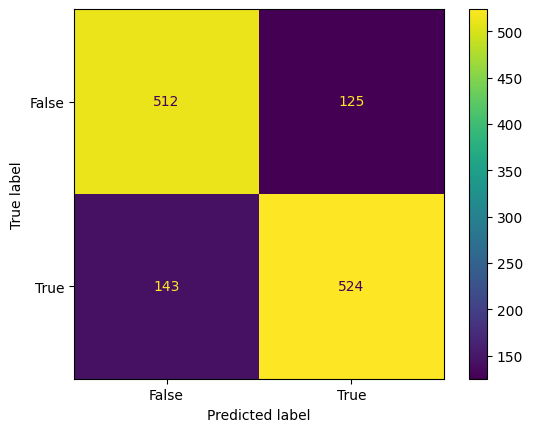

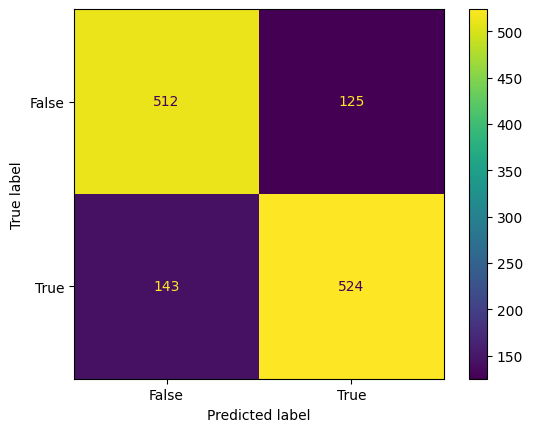

In [17]:
## ======== YOUR CODE HERE ======== ##
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred=lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
# Using ConfusionMatrixDisplay because it is updated in new version
conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
conf_matrix.plot()
## ================================ ##

#### Print classification report

In [18]:
## ======== YOUR CODE HERE ======== ##
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
## ================================ ##

              precision    recall  f1-score   support

       False       0.78      0.80      0.79       637
        True       0.81      0.79      0.80       667

    accuracy                           0.79      1304
   macro avg       0.79      0.79      0.79      1304
weighted avg       0.79      0.79      0.79      1304



#### Print accuracy score

In [19]:
## ======== YOUR CODE HERE ======== ##
print(lr.score(X_test,y_test))
## ================================ ##

0.7944785276073619


#### Print ROC-AUC score

In [20]:
## ======== YOUR CODE HERE ======== ##

## Note: Use predict_proba!!! Read documentation/google it
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,lr.predict_proba(X_test)[:,1]))
## ================================ ##

0.8771791498285394


#### Plot ROC-AUC Curve

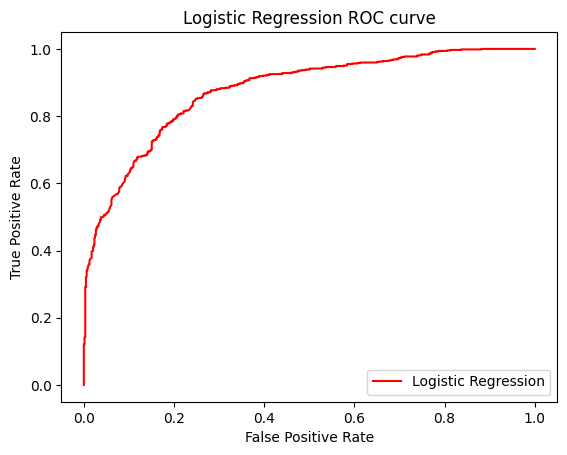

In [21]:
## ======== YOUR CODE HERE ======== ##

## Set appropriate X label, Y label and Title for the graph
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, linestyle='-',color='red', label='Logistic Regression')
plt.title('Logistic Regression ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## ================================ ##
## ================================ ##

#### Cross validation

In [22]:
## ======== YOUR CODE HERE ======== ##

## cv=5
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,X_train,y_train,cv=5))
## ================================ ##

[0.78619756 0.79364005 0.76792963 0.80175913 0.7731889 ]


## <b>SVM</b>
#### Use default parameters unless mentioned

In [23]:
## ======== YOUR CODE HERE ======== ##
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(X_train,y_train)
## ================================ ##

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


#### Plot confusion matrix

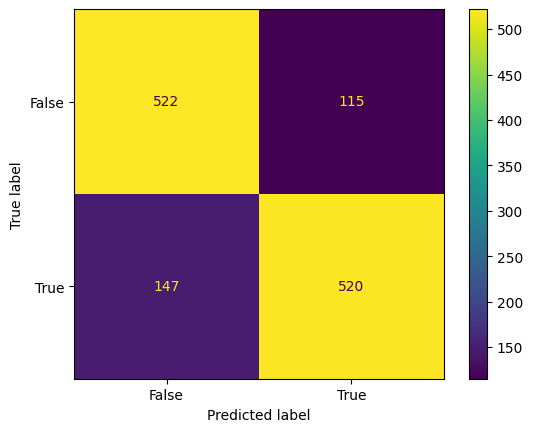

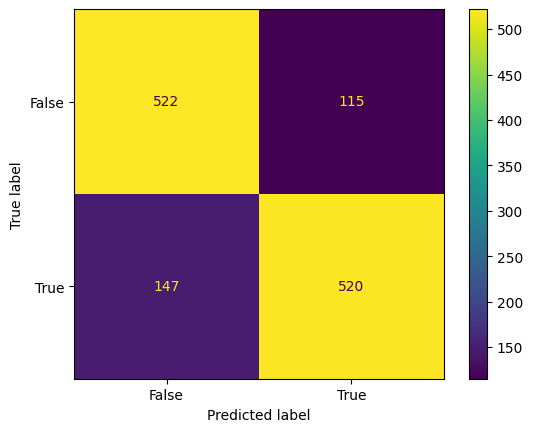

In [24]:
## ======== YOUR CODE HERE ======== ##

## Use display labels as per your choice.
y_pred=svm.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
conf_matrix.plot()
## ================================ ##

#### Print classification report

In [25]:
## ======== YOUR CODE HERE ======== ##
print(classification_report(y_test,y_pred))
## ================================ ##

              precision    recall  f1-score   support

       False       0.78      0.82      0.80       637
        True       0.82      0.78      0.80       667

    accuracy                           0.80      1304
   macro avg       0.80      0.80      0.80      1304
weighted avg       0.80      0.80      0.80      1304



#### Print accuracy score

In [26]:
## ======== YOUR CODE HERE ======== ##
print(svm.score(X_test,y_test))
## ================================ ##

0.799079754601227


#### Print ROC-AUC score

In [27]:
## ======== YOUR CODE HERE ======== ##

## Note: Use predict_proba!!! Read documentation/google it
print(roc_auc_score(y_test,svm.predict_proba(X_test)[:,1]))
## ================================ ##

0.873747584606441


#### Plot ROC-AUC curve

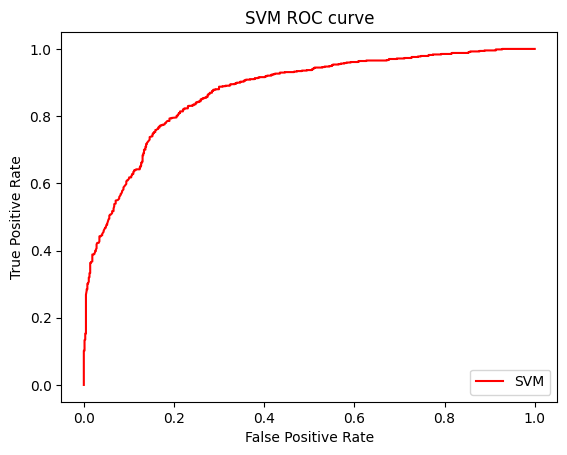

In [28]:
## ======== YOUR CODE HERE ======== ##

## Set appropriate X label, Y label and Title for the graph
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linestyle='-',color='red', label='SVM')
plt.title('SVM ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
## ================================ ##

#### Cross validation

In [29]:
## ======== YOUR CODE HERE ======== ##

## cv=5

print(cross_val_score(svm,X_train,y_train,cv=5))

## ================================ ##

## ================================ ##

[0.78755074 0.78890392 0.76860622 0.80175913 0.76980366]


# Congratulations! Assignment Completed!